In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Exploration

uploadd = files.upload()
f_name = list(uploadd.keys())[0]
df = pd.read_csv(f_name)

#Overview of the overall dataset
print("High level Info")
print(df.info())

print(df.head())

print("Summary of categorical attributes")
for col in df.columns:
    print(f"\n{col}:\n")
    print(df[col].value_counts())

Saving myCarTrainDataset_2025.csv to myCarTrainDataset_2025.csv
High level Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    500 non-null    object
 1   maint    500 non-null    object
 2   persons  500 non-null    int64 
 3   safety   500 non-null    object
 4   accept   500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB
None
  price maint  persons safety accept
0  high  high        4    med     no
1   low  high        5   high    yes
2  high   low        5    low     no
3   low   low        2    low     no
4  high   low        4   high    yes
Summary of categorical attributes

price:

price
low     254
high    246
Name: count, dtype: int64

maint:

maint
high    254
low     246
Name: count, dtype: int64

persons:

persons
5    172
2    166
4    162
Name: count, dtype: int64

safety:

safety
low     171
med     166
hi


Attribute: price

Frequency counts:
 price
high    246
low     254
Name: count, dtype: int64

Percent (%):
price
high    49.2
low     50.8
Name: count, dtype: float64

Cross-Tabulation of Acceptability by price (Counts / %):
               high          low  Total Count Total %
accept                                               
no      203 / 82.5%  154 / 60.6%          357   71.4%
yes      43 / 17.5%  100 / 39.4%          143   28.6%


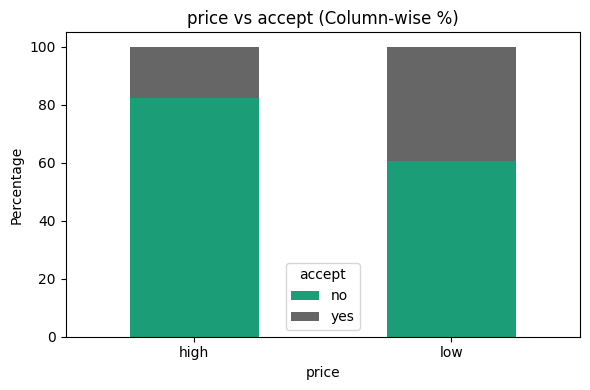


Attribute: maint

Frequency counts:
 maint
high    254
low     246
Name: count, dtype: int64

Percent (%):
maint
high    50.8
low     49.2
Name: count, dtype: float64

Cross-Tabulation of Acceptability by maint (Counts / %):
               high          low  Total Count Total %
accept                                               
no      201 / 79.1%  156 / 63.4%          357   71.4%
yes      53 / 20.9%   90 / 36.6%          143   28.6%


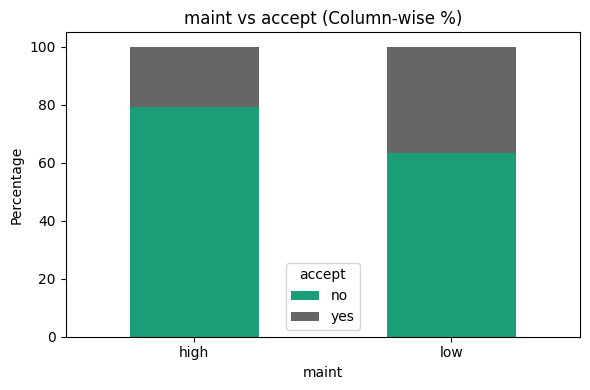


Attribute: persons

Frequency counts:
 persons
2    166
4    162
5    172
Name: count, dtype: int64

Percent (%):
persons
2    33.2
4    32.4
5    34.4
Name: count, dtype: float64

Cross-Tabulation of Acceptability by persons (Counts / %):
                   2           4            5  Total Count Total %
accept                                                            
no      166 / 100.0%  91 / 56.2%  100 / 58.1%          357   71.4%
yes         0 / 0.0%  71 / 43.8%   72 / 41.9%          143   28.6%


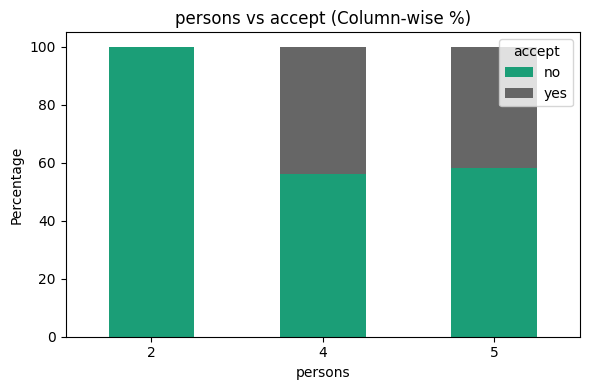


Attribute: safety

Frequency counts:
 safety
high    163
low     171
med     166
Name: count, dtype: int64

Percent (%):
safety
high    32.6
low     34.2
med     33.2
Name: count, dtype: float64

Cross-Tabulation of Acceptability by safety (Counts / %):
              high           low          med  Total Count Total %
accept                                                            
no      78 / 47.9%  171 / 100.0%  108 / 65.1%          357   71.4%
yes     85 / 52.1%      0 / 0.0%   58 / 34.9%          143   28.6%


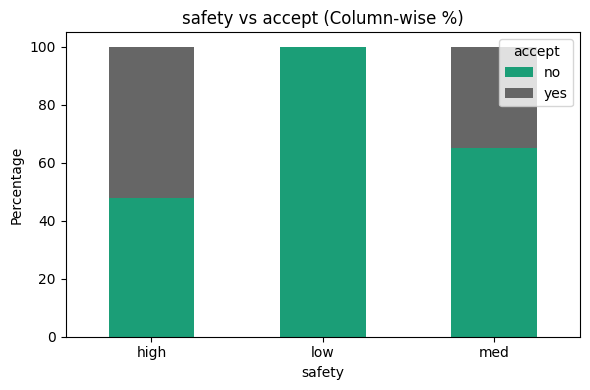

In [3]:
atribute = ['price', 'maint', 'persons', 'safety']
targ = 'accept'

def data_exploration(df, atribute, target=targ):
  for col in atribute:
    print(f"\nAttribute: {col}")

    # Frequency table
    feq = df[col].value_counts().sort_index()
    print(f"\nFrequency counts:\n", feq)

    try:
      pct = (feq / len(df)) * 100
      print("\nPercent (%):")
      print(pct.round(1))
    except:
      print("Unable to compute pct for:", col)

    # Cross-tab counts
    ctab = pd.crosstab(df[targ], df[col])

    # Column-wise percentages (for Gini)
    ctab_col_pct = ctab.div(ctab.sum(axis=0), axis=1) * 100

    displayTab = pd.DataFrame(index=ctab.index)
    for value in ctab.columns:
      displayTab[value] = ctab.apply(lambda x: f"{x[value]} / {ctab_col_pct.loc[x.name, value]:.1f}%", axis=1)

    total_cnt = ctab.sum(axis=1)
    total_pct = (total_cnt / ctab.values.sum() * 100).round(1)
    displayTab['Total Count'] = total_cnt
    displayTab['Total %'] = total_pct.astype(str) + '%'

    print(f"\nCross-Tabulation of Acceptability by {col} (Counts / %):")
    print(displayTab)

    # Stacked bar chart
    ax = ctab_col_pct.T.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Dark2')
    plt.title(f'{col} vs {targ} (Column-wise %)')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.xticks(rotation=0)
    plt.legend(title=targ)
    plt.tight_layout()
    plt.show()

data_exploration(df, atribute)

In [4]:
# STEP 1: Calculate gini(D)
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

class_value_counts = df[targ].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
accept
no     357
yes    143
Name: count, dtype: int64

Gini Impurity of the class is 0.408


In [5]:
# STEP 2:
# Calculating  gini impurity for the attiributes
atribute = ['price', 'maint', 'persons', 'safety']
def gini_split_a(atribute):
    attribute_values = df[atribute].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = df[targ][df[atribute] == key].value_counts()
        n_k = attribute_values[key]
        n = df.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in atribute:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for price is 0.384
Gini for maint is 0.396
Gini for persons is 0.327
Gini for safety is 0.314


In [6]:
# STEP 3:
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.314 
The maximum value of Gini Gain     : 0.686 
The selected attiribute is:  maint


In [10]:
uploadd1 = files.upload()
f_name = list(uploadd1.keys())[0]
test = pd.read_csv(f_name)

def my_tree(atribute):
    # safety = low -> always no
    if atribute['safety'] == 'low':
        return 'no'

    # safety = high
    elif atribute['safety'] == 'high':
        if atribute['persons'] == 4:
            if atribute['maint'] == 'low':
                return 'yes'
            else:
                return 'no'
        elif atribute['persons'] == 5:
            if atribute['maint'] == 'low':
                return 'yes'
            else:
                return 'no'
        else:
            # persons is not 4 or 5
            return 'no'

    # safety = med
    elif atribute['safety'] == 'med':
        if atribute['persons'] == 4:
            if atribute['maint'] == 'low':
                return 'yes'
            else:
                return 'no'
        elif atribute['persons'] == 5:
            if atribute['maint'] == 'low':
                return 'yes'
            else:
                return 'no'
        else:
            # persons is not 4 or 5
            return 'no'

    # any other unexpected safety value
    else:
        return 'no'

test['predicted'] = test.apply(my_tree, axis=1)

Saving myCarTestDataset_2025.csv to myCarTestDataset_2025 (1).csv


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

test['predicted'] = test.apply(my_tree, axis=1)
y_true = test['accept']
y_pred = test['predicted']

cm = confusion_matrix(y_true, y_pred, labels=['yes', 'no'])
acc = accuracy_score(y_true, y_pred)
print(cm)
print(acc)

[[11  8]
 [ 3 28]]
0.78
